# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech


- Nama: Wildan Fadhil Nazaruddin
- Email: wildanfadhil76@gmail.com
- ID Dicoding: -

## Persiapan

### Menyiapkan library yang dibutuhkan

In [20]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize

# Model
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Streamlit
import streamlit as st
# Model Deployment


# Save Model
import pickle
from joblib import dump

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
# Membaca data dari  data
df = pd.read_csv('../submission/data/data.csv', delimiter=';')
# membuat salinan dari data untuk memudahkan modeling
df_model = df.copy()

In [4]:
df_eda = df.copy()

### Data Understanding



Dataset ini berasal dari institusi pendidikan tinggi dan berisi data mahasiswa yang terdaftar di berbagai program sarjana seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, pelayanan sosial, dan teknologi. Data dikumpulkan dari beberapa basis data terpisah dan mencakup informasi yang diketahui saat pendaftaran mahasiswa (jalur akademik, demografi, dan faktor sosial-ekonomi) serta performa akademik mahasiswa di akhir semester pertama dan kedua. Dataset ini digunakan untuk membangun model klasifikasi dalam memprediksi kemungkinan mahasiswa dropout dan keberhasilan akademik.


| Nama Kolom                                 | Deskripsi                                                                                                   |
|---------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Marital_status                             | Status pernikahan mahasiswa. (1: lajang, 2: menikah, 3: duda/janda, 4: cerai, 5: union de facto, 6: pisah) |
| Application_mode                           | Metode pendaftaran yang digunakan mahasiswa. (Kode sesuai jenis jalur pendaftaran)                          |
| Application_order                          | Urutan pilihan pendaftaran mahasiswa (0: pilihan pertama, 9: pilihan terakhir)                             |
| Course                                     | Program studi yang diambil mahasiswa (kode sesuai jurusan)                                                  |
| Daytime_evening_attendance                 | Waktu kehadiran kuliah (1: siang, 0: malam)                                                                |
| Previous_qualification                     | Kualifikasi pendidikan sebelum masuk perguruan tinggi (kode sesuai tingkat pendidikan)                      |
| Previous_qualification_grade               | Nilai kualifikasi sebelumnya (0-200)                                                                       |
| Nacionality                                | Kewarganegaraan mahasiswa (kode negara)                                                                    |
| Mothers_qualification                      | Kualifikasi pendidikan ibu mahasiswa (kode sesuai tingkat pendidikan)                                       |
| Fathers_qualification                      | Kualifikasi pendidikan ayah mahasiswa (kode sesuai tingkat pendidikan)                                      |
| Mothers_occupation                         | Pekerjaan ibu mahasiswa (kode sesuai jenis pekerjaan)                                                       |
| Fathers_occupation                         | Pekerjaan ayah mahasiswa (kode sesuai jenis pekerjaan)                                                      |
| Admission_grade                            | Nilai masuk mahasiswa (0-200)                                                                              |
| Displaced                                  | Apakah mahasiswa merupakan pendatang (1: ya, 0: tidak)                                                     |
| Educational_special_needs                  | Apakah mahasiswa memiliki kebutuhan khusus (1: ya, 0: tidak)                                               |
| Debtor                                     | Apakah mahasiswa memiliki tunggakan (1: ya, 0: tidak)                                                      |
| Tuition_fees_up_to_date                    | Apakah pembayaran uang kuliah mahasiswa sudah lunas (1: ya, 0: tidak)                                      |
| Gender                                     | Jenis kelamin mahasiswa (1: laki-laki, 0: perempuan)                                                       |
| Scholarship_holder                         | Apakah mahasiswa penerima beasiswa (1: ya, 0: tidak)                                                       |
| Age_at_enrollment                          | Usia mahasiswa saat mendaftar                                                                              |
| International                              | Apakah mahasiswa internasional (1: ya, 0: tidak)                                                           |
| Curricular_units_1st_sem_credited          | Jumlah mata kuliah yang diakui pada semester 1                                                             |
| Curricular_units_1st_sem_enrolled          | Jumlah mata kuliah yang diambil pada semester 1                                                            |
| Curricular_units_1st_sem_evaluations       | Jumlah mata kuliah yang dievaluasi pada semester 1                                                         |
| Curricular_units_1st_sem_approved          | Jumlah mata kuliah yang lulus pada semester 1                                                              |
| Curricular_units_1st_sem_grade             | Nilai rata-rata mata kuliah semester 1                                                                     |
| Curricular_units_1st_sem_without_evaluations | Jumlah mata kuliah tanpa evaluasi pada semester 1                                                        |
| Curricular_units_2nd_sem_credited          | Jumlah mata kuliah yang diakui pada semester 2                                                             |
| Curricular_units_2nd_sem_enrolled          | Jumlah mata kuliah yang diambil pada semester 2                                                            |
| Curricular_units_2nd_sem_evaluations       | Jumlah mata kuliah yang dievaluasi pada semester 2                                                         |
| Curricular_units_2nd_sem_approved          | Jumlah mata kuliah yang lulus pada semester 2                                                              |
| Curricular_units_2nd_sem_grade             | Nilai rata-rata mata kuliah semester 2                                                                     |
| Curricular_units_2nd_sem_without_evaluations | Jumlah mata kuliah tanpa evaluasi pada semester 2                                                        |
| Unemployment_rate                          | Tingkat pengangguran pada tahun pendaftaran                                                                |
| Inflation_rate                             | Tingkat inflasi pada tahun pendaftaran                                                                     |
| GDP                                        | Produk Domestik Bruto pada tahun pendaftaran                                                               |
| Status                                     | Status akhir mahasiswa (Dropout, Graduate, Enrolled)                                                       |

Dataset ini sangat kaya dan dapat digunakan untuk analisis prediktif terkait performa dan risiko dropout mahasiswa berdasarkan faktor akademik, demografi, dan sosial-ekonomi.

In [26]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)
# melihat sample data
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

```markdown
Dataset ini terdiri dari 4.424 baris data mahasiswa dengan 37 kolom fitur yang merepresentasikan berbagai aspek akademik, demografi, dan sosial-ekonomi mahasiswa. Berikut penjelasan umum dari struktur dataset:

- **Jumlah Data:** 4.424 mahasiswa (baris)
- **Jumlah Fitur:** 37 kolom
- **Tipe Data:** 
    - 29 kolom bertipe numerik diskrit (`int64`), seperti status pernikahan, mode pendaftaran, jenis kelamin, dll.
    - 7 kolom bertipe numerik kontinu (`float64`), seperti nilai masuk, nilai rata-rata mata kuliah, tingkat pengangguran, inflasi, dan GDP.
    - 1 kolom bertipe kategori (`object`), yaitu kolom `Status` yang berisi label target (Dropout, Graduate, Enrolled).

**Setiap baris merepresentasikan satu mahasiswa** dengan informasi lengkap mulai dari data pribadi, latar belakang pendidikan, kondisi ekonomi keluarga, hingga performa akademik pada semester pertama dan kedua. Data ini sangat kaya dan dapat digunakan untuk analisis prediktif, khususnya dalam memprediksi risiko dropout dan keberhasilan studi mahasiswa berdasarkan faktor-faktor yang tersedia.

**Tidak terdapat missing value** pada seluruh kolom, sehingga data siap untuk tahap analisis dan pemodelan lebih lanjut.
```

ada satu fitur di mana tipe data pada kolom status  akan diubah menjadi int

In [8]:
# melihat missing value
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


- Cek Missing Value :

Pada tahap ini, dilakukan pengecekan terhadap nilai hilang (missing value) pada setiap kolom dalam dataset. Hasil yang ditampilkan menunjukkan bahwa seluruh kolom memiliki nilai 0 pada jumlah missing value, artinya **tidak ada data yang hilang (NaN) pada dataset ini**. Dengan demikian, proses pembersihan data terkait missing value tidak diperlukan dan analisis dapat dilanjutkan ke tahap berikutnya tanpa perlu melakukan imputasi atau penghapusan data.

In [9]:
# melihat duplikat data
df.duplicated().sum()

np.int64(0)

tidak terdapat nilai duplikasi

In [10]:
# statistik deskriptif
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000




- **Usia Mahasiswa**: Usia saat pendaftaran berkisar antara 17 hingga 70 tahun, dengan median 20 tahun.
- **Nilai Akademik**: Nilai masuk (`Admission_grade`) rata-rata 127, dengan rentang 95–190.
- **Kehadiran**: Mayoritas mahasiswa mengikuti kelas siang hari (`Daytime_evening_attendance` median = 1).
- **Status Ekonomi**: Sebagian besar mahasiswa tidak memiliki tunggakan pembayaran (`Debtor` median = 0) dan pembayaran kuliah sudah lunas (`Tuition_fees_up_to_date` median = 1).
- **Gender**: Proporsi mahasiswa laki-laki lebih banyak (mean `Gender` = 0.35, dengan 1 = laki-laki).
- **Kinerja Akademik Semester 1 & 2**: Rata-rata jumlah mata kuliah yang diambil dan lulus pada semester 1 dan 2 cukup konsisten, dengan nilai rata-rata sekitar 10–12.
- **Faktor Ekonomi Makro**: Terdapat variasi pada tingkat pengangguran, inflasi, dan GDP pada tahun pendaftaran mahasiswa.

Statistik deskriptif ini membantu memahami pola umum, mendeteksi outlier, dan menjadi dasar untuk analisis lebih lanjut serta pemodelan prediktif.

In [38]:
# melihat nilai untuk kolom marial status
marital_status_labels = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}
marital_counts = df['Marital_status'].value_counts().sort_index()
marital_counts.index = marital_counts.index.map(marital_status_labels)
display(marital_counts)

Marital_status
Divorced               91
Facto Union            25
Legally Separated       6
Married               379
Single               3919
Widower                 4
Name: count, dtype: int64

Kolom **Marital_status** merepresentasikan status pernikahan mahasiswa pada saat pendaftaran. Kolom ini bersifat kategorikal dengan kode numerik sebagai berikut:

- **1:** Lajang (single)
- **2:** Menikah (married)
- **3:** Duda/Janda (widower)
- **4:** Cerai (divorced)
- **5:** Union de facto (hidup bersama tanpa menikah secara resmi)
- **6:** Pisah secara hukum (legally separated)

Distribusi data pada kolom ini menunjukkan mayoritas mahasiswa berstatus lajang (**1**) sebanyak 3.919 orang, diikuti oleh yang sudah menikah (**2**) sebanyak 379 orang. Status lainnya seperti cerai, union de facto, pisah hukum, dan duda/janda memiliki proporsi yang jauh lebih kecil. Hal ini mencerminkan bahwa sebagian besar mahasiswa yang terdaftar masih berstatus lajang.

In [39]:
# Mapping kode Application_mode ke deskripsi
application_mode_labels = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}
application_mode_counts = df['Application_mode'].value_counts().sort_index()
application_mode_counts.index = application_mode_counts.index.map(application_mode_labels)
display(application_mode_counts)

Application_mode
1st phase - general contingent                         1708
Ordinance No. 612/93                                      3
1st phase - special contingent (Azores Island)           16
Holders of other higher courses                         139
Ordinance No. 854-B/99                                   10
International student (bachelor)                         30
1st phase - special contingent (Madeira Island)          38
2nd phase - general contingent                          872
3rd phase - general contingent                          124
Ordinance No. 533-A/99, item b2) (Different Plan)         1
Ordinance No. 533-A/99, item b3 (Other Institution)       1
Over 23 years old                                       785
Transfer                                                 77
Change of course                                        312
Technological specialization diploma holders            213
Change of institution/course                             59
Short cycle diploma hol

#### Insghts Kolom Application_mode
Kolom **Application_mode** merepresentasikan metode atau jalur pendaftaran yang digunakan oleh mahasiswa saat masuk ke perguruan tinggi. Kolom ini bersifat kategorikal dengan kode numerik yang menunjukkan jenis jalur pendaftaran tertentu. Berikut penjelasan beberapa kode yang paling sering muncul beserta jumlah mahasiswa pada masing-masing jalur:

- **1 (1st phase - general contingent):** Jalur utama seleksi umum pada fase pertama, merupakan jalur paling umum digunakan (1.708 mahasiswa).
- **17 (2nd phase - general contingent):** Seleksi umum pada fase kedua (872 mahasiswa).
- **39 (Over 23 years old):** Jalur khusus untuk calon mahasiswa berusia di atas 23 tahun (785 mahasiswa).
- **43 (Change of course):** Jalur pindah program studi di dalam institusi yang sama (312 mahasiswa).
- **44 (Technological specialization diploma holders):** Jalur untuk pemegang diploma spesialisasi teknologi (213 mahasiswa).
- **7 (Holders of other higher courses):** Jalur untuk pemegang gelar pendidikan tinggi lain (139 mahasiswa).
- **18 (3rd phase - general contingent):** Seleksi umum pada fase ketiga (124 mahasiswa).
- **42 (Transfer):** Jalur transfer dari institusi lain (77 mahasiswa).
- **51 (Change of institution/course):** Jalur pindah institusi atau program studi (59 mahasiswa).
- **16 (1st phase - special contingent, Madeira Island):** Jalur khusus fase pertama untuk wilayah Madeira (38 mahasiswa).
- **53 (Short cycle diploma holders):** Jalur untuk pemegang diploma pendidikan singkat (35 mahasiswa).
- **15 (International student - bachelor):** Jalur mahasiswa internasional jenjang sarjana (30 mahasiswa).

Kode lainnya seperti 5, 10, 2, 57, 26, dan 27 memiliki jumlah mahasiswa yang jauh lebih sedikit.

Distribusi ini menunjukkan bahwa sebagian besar mahasiswa diterima melalui jalur seleksi umum (fase 1 dan 2), sementara jalur khusus seperti usia di atas 23 tahun, pindah jurusan, dan pemegang diploma juga cukup signifikan. Informasi ini penting untuk memahami latar belakang dan keragaman jalur masuk mahasiswa di institusi pendidikan tersebut.

In [14]:
# Melihat nilai untuk kolom Application_order
df['Application_order'].value_counts()

Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

#### Insght Application_orde
Kolom **Application_order** merepresentasikan urutan pilihan program studi yang diajukan oleh mahasiswa saat mendaftar ke perguruan tinggi. Nilai pada kolom ini bersifat numerik, dengan rentang antara **0** (pilihan pertama) hingga **9** (pilihan terakhir). 

Distribusi data menunjukkan bahwa mayoritas mahasiswa diterima pada pilihan pertama mereka (**1**) sebanyak 3.026 orang, diikuti oleh pilihan kedua (**2**) sebanyak 547 orang, dan seterusnya hingga pilihan keenam (**6**). Sangat sedikit mahasiswa yang diterima pada pilihan kesembilan (**9**) dan bahkan hanya satu orang pada pilihan nol (**0**).

Hal ini mengindikasikan bahwa sebagian besar mahasiswa berhasil masuk ke program studi yang menjadi prioritas utama mereka, sementara hanya sebagian kecil yang diterima pada pilihan yang lebih rendah. Informasi ini penting untuk memahami preferensi mahasiswa dan efektivitas sistem seleksi dalam menempatkan mahasiswa sesuai dengan pilihan utama mereka.

In [40]:
# melihat nilai untuk kolom course
course_labels = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}
course_counts = df['Course'].value_counts().sort_index()
course_counts.index = course_counts.index.map(course_labels)
display(course_counts)

Course
Biofuel Production Technologies          12
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Communication Design                    226
Veterinary Nursing                      337
Informatics Engineering                 170
Equinculture                            141
Management                              380
Social Service                          355
Tourism                                 252
Nursing                                 766
Oral Hygiene                             86
Advertising and Marketing Management    268
Journalism and Communication            331
Basic Education                         192
Management (evening attendance)         268
Name: count, dtype: int64

#### Insight Kolom Course

Distribusi jumlah mahasiswa pada masing-masing program studi adalah sebagai berikut:

| Kode | Program Studi                              | Jumlah Mahasiswa |
|------|--------------------------------------------|------------------|
| 9500 | Nursing                                    | 766              |
| 9147 | Management                                 | 380              |
| 9238 | Social Service                             | 355              |
| 9085 | Veterinary Nursing                         | 337              |
| 9773 | Journalism and Communication               | 331              |
| 9670 | Advertising and Marketing Management       | 268              |
| 9991 | Management (evening attendance)            | 268              |
| 9254 | Tourism                                    | 252              |
| 9070 | Communication Design                       | 226              |
| 171  | Animation and Multimedia Design            | 215              |
| 8014 | Social Service (evening attendance)        | 215              |
| 9003 | Agronomy                                   | 210              |
| 9853 | Basic Education                            | 192              |
| 9119 | Informatics Engineering                    | 170              |
| 9130 | Equinculture                               | 141              |
| 9556 | Oral Hygiene                               | 86               |
| 33   | Biofuel Production Technologies            | 12               |

Dari distribusi di atas, terlihat bahwa program studi **Nursing (9500)** memiliki jumlah mahasiswa terbanyak, diikuti oleh **Management (9147)** dan **Social Service (9238)**. Sementara itu, program studi **Biofuel Production Technologies (33)** merupakan jurusan dengan jumlah mahasiswa paling sedikit. Informasi ini penting untuk memahami peminatan mahasiswa terhadap masing-masing jurusan serta potensi analisis lebih lanjut terkait performa akademik dan risiko dropout berdasarkan program studi.

In [44]:
# melihat nilai untuk kolom Day Daytime/evening attendance
daytime_attendance_labels = {
    1: 'Daytime attendance',
    0: 'Evening attendance'
}
daytime_attendance_counts = df['Daytime_evening_attendance'].value_counts().sort_index()
daytime_attendance_counts.index = daytime_attendance_counts.index.map(daytime_attendance_labels)
display(daytime_attendance_counts)


Daytime_evening_attendance
Evening attendance     483
Daytime attendance    3941
Name: count, dtype: int64

#### Insight Kolom Daytime_evening_attendance

Kolom **Daytime_evening_attendance** menunjukkan waktu kehadiran mahasiswa dalam mengikuti perkuliahan, yang terbagi menjadi dua kategori: **Daytime attendance** (kuliah siang) dan **Evening attendance** (kuliah malam).

- **Daytime attendance:** 3.941 mahasiswa (sekitar 89%)
- **Evening attendance:** 483 mahasiswa (sekitar 11%)

Mayoritas mahasiswa mengikuti perkuliahan pada siang hari. Hanya sebagian kecil yang memilih kelas malam, yang umumnya diikuti oleh mahasiswa dengan kebutuhan khusus seperti bekerja

In [45]:
# Mapping kode Previous_qualification ke deskripsi
previous_qualification_labels = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}
previous_qualification_counts = df['Previous_qualification'].value_counts().sort_index()
previous_qualification_counts.index = previous_qualification_counts.index.map(previous_qualification_labels)
display(previous_qualification_counts)

Previous_qualification
Secondary education                                         3717
Higher education - bachelor's degree                          23
Higher education - degree                                    126
Higher education - master's                                    8
Higher education - doctorate                                   1
Frequency of higher education                                 16
12th year of schooling - not completed                        11
11th year of schooling - not completed                         4
Other - 11th year of schooling                                45
10th year of schooling                                         1
10th year of schooling - not completed                         2
Basic education 3rd cycle (9th/10th/11th year) or equiv.     162
Basic education 2nd cycle (6th/7th/8th year) or equiv.         7
Technological specialization course                          219
Higher education - degree (1st cycle)                         40
Pr

#### Insight Kolom Previous_qualification

Kolom **Previous_qualification** merepresentasikan latar belakang pendidikan terakhir mahasiswa sebelum mendaftar ke perguruan tinggi. Distribusi data menunjukkan:

- **Mayoritas mahasiswa (3.717 orang)** berasal dari **Secondary education** (setara SMA/sederajat), menandakan jalur masuk utama adalah lulusan sekolah menengah.
- **Technological specialization course** (219 orang) dan **Basic education 3rd cycle** (162 orang) juga menjadi sumber signifikan, menunjukkan adanya jalur pendidikan vokasi atau kejuruan.
- Mahasiswa dengan **Higher education - degree** (126 orang) dan **Higher education - bachelor's degree** (23 orang) menandakan adanya mahasiswa yang sudah pernah menempuh pendidikan tinggi sebelumnya.
- Jumlah mahasiswa dengan latar belakang **master** atau **doktor** sangat kecil (masing-masing di bawah 10 orang), menunjukkan program ini memang didominasi oleh lulusan baru, bukan mahasiswa pindahan dari jenjang lebih tinggi.
- Terdapat juga mahasiswa dengan pendidikan yang belum selesai di tingkat tertentu, namun jumlahnya sangat kecil.

Distribusi ini menegaskan bahwa sebagian besar mahasiswa merupakan lulusan baru dari pendidikan menengah, dengan sebagian kecil berasal dari jalur pendidikan non-tradisional atau sudah pernah menempuh pendidikan tinggi sebelumnya. Insight ini penting untuk memahami karakteristik awal mahasiswa dan potensi pengaruh latar belakang pendidikan terhadap performa akademik di perguruan tinggi.

Statistik deskriptif Previous_qualification_grade:
count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: Previous_qualification_grade, dtype: float64


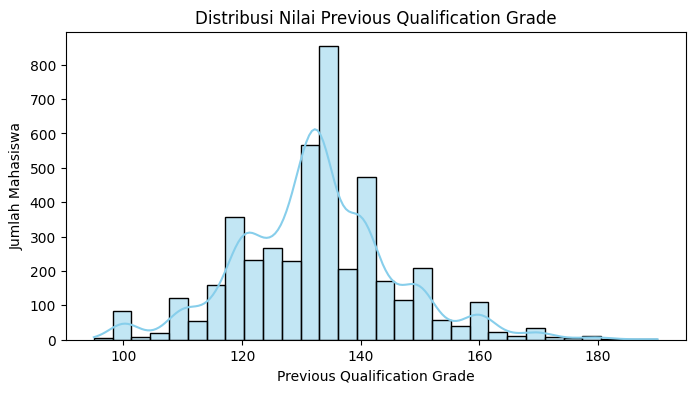

In [46]:
# Statistik deskriptif untuk kolom Previous_qualification_grade
print("Statistik deskriptif Previous_qualification_grade:")
print(df['Previous_qualification_grade'].describe())

# Visualisasi distribusi nilai Previous_qualification_grade
plt.figure(figsize=(8, 4))
sns.histplot(df['Previous_qualification_grade'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Nilai Previous Qualification Grade')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

#### Statistik Deskriptif Kolom Previous_qualification_grade

Kolom **Previous_qualification_grade** merepresentasikan nilai kualifikasi pendidikan terakhir mahasiswa sebelum mendaftar ke perguruan tinggi. Berikut adalah statistik deskriptifnya:

- **Jumlah data:** 4.424 mahasiswa
- **Rata-rata (mean):** 132,6
- **Standar deviasi:** 13,19
- **Nilai minimum:** 95
- **Kuartil 1 (25%):** 125
- **Median (50%):** 133,1
- **Kuartil 3 (75%):** 140
- **Nilai maksimum:** 190

Sebagian besar mahasiswa memiliki nilai kualifikasi sebelumnya di kisaran 125–140, dengan nilai median 133,1. Rentang nilai yang cukup lebar (95–190) menunjukkan adanya variasi kemampuan akademik mahasiswa saat masuk, namun distribusi cenderung terpusat di sekitar nilai rata-rata. Insight ini penting untuk memahami latar belakang akademik awal mahasiswa sebelum mengikuti perkuliahan di perguruan tinggi.

In [47]:
# Mapping kode Nacionality ke deskripsi negara
nacionality_labels = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
nacionality_counts = df['Nacionality'].value_counts().sort_index()
nacionality_counts.index = nacionality_counts.index.map(nacionality_labels)
display(nacionality_counts)

Nacionality
Portuguese               4314
German                      2
Spanish                    13
Italian                     3
Dutch                       1
English                     1
Lithuanian                  1
Angolan                     2
Cape Verdean               13
Guinean                     5
Mozambican                  2
Santomean                  14
Turkish                     1
Brazilian                  38
Romanian                    2
Moldova (Republic of)       3
Mexican                     2
Ukrainian                   3
Russian                     2
Cuban                       1
Colombian                   1
Name: count, dtype: int64

#### Insight Kolom Nacionality

Kolom **Nacionality** merepresentasikan kewarganegaraan mahasiswa yang terdaftar dalam dataset. Distribusi data menunjukkan bahwa:

- **Mayoritas mahasiswa berasal dari Portugal** (4.314 orang), mencerminkan bahwa institusi ini didominasi oleh mahasiswa lokal.
- Negara lain yang terwakili dalam jumlah kecil antara lain: Brazil (38), Spanish (13), Cape Verdean (13), Santomean (14), serta beberapa negara Eropa dan Afrika lainnya.
- Hanya terdapat segelintir mahasiswa dari negara-negara seperti German, Italian, Dutch, English, Lithuanian, Angolan, Guinean, Mozambican, Turkish, Romanian, Moldova, Mexican, Ukrainian, Russian, Cuban, dan Colombian (masing-masing kurang dari 5 orang).

**Kesimpulan:**  
Dataset sangat didominasi oleh mahasiswa berkewarganegaraan Portugis, sementara mahasiswa internasional hanya merupakan minoritas kecil. Hal ini penting untuk diperhatikan dalam analisis lebih lanjut, terutama jika ingin melihat pengaruh faktor kewarganegaraan terhadap performa akademik atau risiko dropout.

In [48]:
# Mapping kode Mothers_qualification ke deskripsi
mothers_qualification_labels = {
    1: 'Secondary Education - 12th Year or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master\'s",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Eq.',
    22: 'Technical-professional Course',
    26: '7th Year of Schooling',
    27: '2nd Cycle of General High School Course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    34: 'Unknown',
    35: "Can't Read or Write",
    36: 'Can Read Without 4th Year of Schooling',
    37: 'Basic Education 1st Cycle (4th/5th Year) or Eq.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Eq.',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)',
    44: 'Higher Education - Doctorate (3rd Cycle)'
}
mothers_qualification_counts = df['Mothers_qualification'].value_counts().sort_index()
mothers_qualification_counts.index = mothers_qualification_counts.index.map(mothers_qualification_labels)
display(mothers_qualification_counts)

Mothers_qualification
Secondary Education - 12th Year or Eq.                   1069
Higher Education - Bachelor's Degree                       83
Higher Education - Degree                                 438
Higher Education - Master's                                49
Higher Education - Doctorate                               21
Frequency of Higher Education                               4
12th Year of Schooling - Not Completed                      8
11th Year of Schooling - Not Completed                      3
7th Year (Old)                                              3
Other - 11th Year of Schooling                             42
10th Year of Schooling                                      2
General Commerce Course                                     1
Basic Education 3rd Cycle (9th/10th/11th Year) or Eq.     953
Technical-professional Course                               1
7th Year of Schooling                                       1
2nd Cycle of General High School Course         

#### Insight Kolom Mothers_qualification

Kolom **Mothers_qualification** merepresentasikan tingkat pendidikan terakhir yang dicapai oleh ibu mahasiswa. Distribusi data menunjukkan:

- **Mayoritas ibu mahasiswa memiliki pendidikan menengah atas** (Secondary Education - 12th Year or Eq.) sebanyak **1.069 orang** dan pendidikan dasar siklus pertama (Basic Education 1st Cycle) sebanyak **1.009 orang**.
- **Pendidikan dasar siklus ketiga** (Basic Education 3rd Cycle) juga cukup signifikan, yaitu **953 orang**.
- Ibu dengan pendidikan tinggi (Higher Education - Degree, Bachelor's, Master's, Doctorate) jumlahnya lebih sedikit, dengan rincian: Degree (**438**), Bachelor's (**83**), Master's (**49**), dan Doctorate (**21**).
- Terdapat **130 data Unknown** (tidak diketahui) dan sebagian kecil ibu dengan pendidikan sangat rendah (tidak bisa membaca/menulis, hanya sampai tahun ke-7 atau ke-8 sekolah).
- Kualifikasi khusus seperti Technological Specialization Course, Professional Higher Technical Course, dan lain-lain jumlahnya sangat kecil (kurang dari 10 orang per kategori).

**Kesimpulan:**  
Sebagian besar ibu mahasiswa memiliki latar belakang pendidikan menengah atau dasar, sementara proporsi ibu dengan pendidikan tinggi masih relatif kecil. Hal ini dapat menjadi faktor penting dalam analisis pengaruh latar belakang pendidikan orang tua terhadap performa akademik mahasiswa.

In [49]:
# Mapping kode Fathers_qualification ke deskripsi
fathers_qualification_labels = {
    1: 'Secondary Education - 12th Year or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd Year Complementary High School Course',
    14: '10th Year of Schooling',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Eq.',
    20: 'Complementary High School Course',
    22: 'Technical-professional Course',
    25: 'Complementary High School Course - Not Concluded',
    26: '7th Year of Schooling',
    27: '2nd Cycle of General High School Course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: "Can't Read or Write",
    36: 'Can Read Without 4th Year of Schooling',
    37: 'Basic Education 1st Cycle (4th/5th Year) or Eq.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Eq.',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)',
    44: 'Higher Education - Doctorate (3rd Cycle)'
}
fathers_qualification_counts = df['Fathers_qualification'].value_counts().sort_index()
fathers_qualification_counts.index = fathers_qualification_counts.index.map(fathers_qualification_labels)
display(fathers_qualification_counts)

Fathers_qualification
Secondary Education - 12th Year or Eq.                    904
Higher Education - Bachelor's Degree                       68
Higher Education - Degree                                 282
Higher Education - Master's                                39
Higher Education - Doctorate                               18
Frequency of Higher Education                               2
12th Year of Schooling - Not Completed                      5
11th Year of Schooling - Not Completed                      2
7th Year (Old)                                             10
Other - 11th Year of Schooling                             38
2nd Year Complementary High School Course                   1
10th Year of Schooling                                      4
General Commerce Course                                     1
Basic Education 3rd Cycle (9th/10th/11th Year) or Eq.     968
Complementary High School Course                            1
Technical-professional Course                   

#### Insight Kolom Fathers_qualification

Kolom **Fathers_qualification** merepresentasikan tingkat pendidikan terakhir ayah mahasiswa. Distribusi data menunjukkan:

- **Mayoritas ayah mahasiswa memiliki pendidikan dasar siklus pertama** (Basic Education 1st Cycle) sebanyak **1.209 orang** dan pendidikan dasar siklus ketiga (Basic Education 3rd Cycle) sebanyak **968 orang**.
- Pendidikan menengah atas (Secondary Education - 12th Year or Eq.) juga cukup signifikan, yaitu **904 orang**.
- Ayah dengan pendidikan tinggi (Degree, Bachelor's, Master's, Doctorate) jumlahnya lebih sedikit: Degree (**282**), Bachelor's (**68**), Master's (**39**), dan Doctorate (**18**).
- Terdapat **112 data Unknown** (tidak diketahui) dan sebagian kecil ayah dengan pendidikan sangat rendah (tidak bisa membaca/menulis, hanya sampai tahun ke-7 atau ke-8 sekolah).
- Kualifikasi khusus seperti Technological Specialization Course, Professional Higher Technical Course, dan lain-lain jumlahnya sangat kecil (kurang dari 20 orang per kategori).

**Kesimpulan:**  
Sebagian besar ayah mahasiswa memiliki latar belakang pendidikan dasar atau menengah, sementara proporsi ayah dengan pendidikan tinggi masih relatif kecil. Hal ini dapat menjadi faktor penting dalam analisis pengaruh latar belakang pendidikan orang tua terhadap performa akademik mahasiswa.

In [51]:
# Mapping kode Mothers_occupation ke deskripsi pekerjaan
mothers_occupation_labels = {
    0: 'Student',
    1: 'Legislative/Executive/Directors/Managers',
    2: 'Intellectual/Scientific Specialists',
    3: 'Intermediate Technicians/Professions',
    4: 'Administrative staff',
    5: 'Personal Services/Security/Sellers',
    6: 'Farmers/Skilled Agriculture/Fisheries/Forestry',
    7: 'Skilled Industry/Construction/Craftsmen',
    8: 'Machine Operators/Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'ICT Specialists',
    131: 'Intermediate Science/Engineering Technicians',
    132: 'Intermediate Health Technicians/Professionals',
    134: 'Intermediate Legal/Social/Sports/Cultural Technicians',
    141: 'Office workers/Secretaries/Data Processing',
    143: 'Data/Accounting/Statistical/Financial/Registry Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers',
    171: 'Skilled Construction Workers (except electricians)',
    173: 'Skilled Printing/Precision/Jewelers/Artisans',
    175: 'Food Processing/Woodworking/Clothing/Other Crafts',
    191: 'Cleaning Workers',
    192: 'Unskilled Agriculture/Animal/Fisheries/Forestry',
    193: 'Unskilled Extractive/Construction/Manufacturing/Transport',
    194: 'Meal Preparation Assistants'
}
mothers_occupation_counts = df['Mothers_occupation'].value_counts().sort_index()
mothers_occupation_counts.index = mothers_occupation_counts.index.map(mothers_occupation_labels)
display(mothers_occupation_counts)

Mothers_occupation
Student                                                       144
Legislative/Executive/Directors/Managers                      102
Intellectual/Scientific Specialists                           318
Intermediate Technicians/Professions                          351
Administrative staff                                          817
Personal Services/Security/Sellers                            530
Farmers/Skilled Agriculture/Fisheries/Forestry                 91
Skilled Industry/Construction/Craftsmen                       272
Machine Operators/Assembly Workers                             36
Unskilled Workers                                            1577
Armed Forces Professions                                        4
Other Situation                                                70
Blank                                                          17
Health professionals                                            2
Teachers                                                 

#### Insight Kolom Mothers_occupation

Kolom **Mothers_occupation** merepresentasikan jenis pekerjaan ibu mahasiswa. Distribusi data menunjukkan:

- **Mayoritas ibu mahasiswa bekerja sebagai Unskilled Workers** (1.577 orang), diikuti oleh **Administrative staff** (817 orang), **Personal Services/Security/Sellers** (530 orang), **Intermediate Technicians/Professions** (351 orang), dan **Intellectual/Scientific Specialists** (318 orang).
- Pekerjaan lain seperti **Skilled Industry/Construction/Craftsmen** (272 orang), **Student** (144 orang), dan **Farmers/Skilled Agriculture/Fisheries/Forestry** (91 orang) juga cukup signifikan.
- Sebagian kecil ibu bekerja di bidang **Legislative/Executive/Directors/Managers** (102 orang), **Other Situation** (70 orang), serta berbagai profesi spesifik seperti **Teachers**, **Health professionals**, **ICT Specialists**, dan lain-lain (masing-masing di bawah 10 orang).
- Terdapat juga kategori **Blank** (17 orang) dan pekerjaan dengan jumlah sangat kecil seperti **Armed Forces Professions**, **Meal Preparation Assistants**, dan **Cleaning Workers**.

**Kesimpulan:**  
Sebagian besar ibu mahasiswa bekerja di sektor informal atau pekerjaan tidak terampil, sementara proporsi ibu dengan pekerjaan profesional atau manajerial masih relatif kecil. Hal ini dapat menjadi faktor penting dalam analisis pengaruh latar belakang pekerjaan orang tua terhadap performa akademik mahasiswa.

In [52]:
# Mapping kode Fathers_occupation ke deskripsi pekerjaan
fathers_occupation_labels = {
    0: 'Student',
    1: 'Legislative/Executive/Directors/Managers',
    2: 'Intellectual/Scientific Specialists',
    3: 'Intermediate Technicians/Professions',
    4: 'Administrative staff',
    5: 'Personal Services/Security/Sellers',
    6: 'Farmers/Skilled Agriculture/Fisheries/Forestry',
    7: 'Skilled Industry/Construction/Craftsmen',
    8: 'Machine Operators/Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel/catering/trade/other services directors',
    121: 'Physical sciences/math/engineering specialists',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Finance/accounting/admin/public/commercial specialists',
    131: 'Intermediate science/engineering technicians',
    132: 'Intermediate health technicians/professionals',
    134: 'Intermediate legal/social/sports/cultural technicians',
    135: 'ICT technicians',
    141: 'Office workers/secretaries/data processing',
    143: 'Data/accounting/statistical/financial/registry operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers',
    154: 'Protection/security services personnel',
    161: 'Market-oriented skilled agricultural/animal workers',
    163: 'Farmers/livestock/fishermen/hunters/gatherers (subsistence)',
    171: 'Skilled construction workers (except electricians)',
    172: 'Skilled metallurgy/metalworking workers',
    174: 'Skilled electricity/electronics workers',
    175: 'Food processing/woodworking/clothing/other crafts',
    181: 'Fixed plant/machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers/mobile equipment operators',
    192: 'Unskilled agriculture/animal/fisheries/forestry workers',
    193: 'Unskilled extractive/construction/manufacturing/transport workers',
    194: 'Meal preparation assistants',
    195: 'Street vendors/service providers'
}
fathers_occupation_counts = df['Fathers_occupation'].value_counts().sort_index()
fathers_occupation_counts.index = fathers_occupation_counts.index.map(fathers_occupation_labels)
display(fathers_occupation_counts)

Fathers_occupation
Student                                                               128
Legislative/Executive/Directors/Managers                              134
Intellectual/Scientific Specialists                                   197
Intermediate Technicians/Professions                                  384
Administrative staff                                                  386
Personal Services/Security/Sellers                                    516
Farmers/Skilled Agriculture/Fisheries/Forestry                        242
Skilled Industry/Construction/Craftsmen                               666
Machine Operators/Assembly Workers                                    318
Unskilled Workers                                                    1010
Armed Forces Professions                                              266
Other Situation                                                        65
Blank                                                                  19
Armed Forces Office

#### Insight Kolom Fathers_occupation

Kolom **Fathers_occupation** merepresentasikan jenis pekerjaan ayah mahasiswa. Distribusi data menunjukkan:

- **Mayoritas ayah mahasiswa bekerja sebagai Unskilled Workers** (1.010 orang), diikuti oleh **Skilled Industry/Construction/Craftsmen** (666 orang), **Personal Services/Security/Sellers** (516 orang), **Administrative staff** (386 orang), dan **Intermediate Technicians/Professions** (384 orang).
- Pekerjaan lain yang cukup banyak adalah **Machine Operators/Assembly Workers** (318 orang), **Armed Forces Professions** (266 orang), dan **Farmers/Skilled Agriculture/Fisheries/Forestry** (242 orang).
- Sebagian kecil ayah bekerja di bidang profesional seperti **Intellectual/Scientific Specialists** (197 orang), **Legislative/Executive/Directors/Managers** (134 orang), serta kategori **Student** (128 orang).
- Kategori pekerjaan lain seperti **Other Situation**, **Blank**, dan berbagai profesi spesifik (misal: Teachers, Health professionals, ICT technicians, dll) jumlahnya sangat kecil (kurang dari 20 orang per kategori).
- Terdapat juga kategori pekerjaan yang sangat jarang seperti **Armed Forces Officers**, **Hotel/catering/trade/other services directors**, **Physical sciences/math/engineering specialists**, dan lain-lain (masing-masing 1–4 orang).

**Kesimpulan:**  
Sebagian besar ayah mahasiswa bekerja di sektor informal atau pekerjaan tidak terampil, sementara proporsi ayah dengan pekerjaan profesional atau manajerial masih relatif kecil. Hal ini dapat menjadi faktor penting dalam analisis pengaruh latar belakang pekerjaan orang tua terhadap performa akademik mahasiswa.

In [60]:
# Mapping kode Displaced ke deskripsi
displaced_labels = {1: 'Yes', 0: 'No'}
displaced_counts = df['Displaced'].value_counts().sort_index()
displaced_counts.index = displaced_counts.index.map(displaced_labels)
display(displaced_counts)
# Mapping kode Educational_special_needs ke deskripsi
educational_special_needs_labels = {1: 'Yes', 0: 'No'}
educational_special_needs_counts = df['Educational_special_needs'].value_counts().sort_index()
educational_special_needs_counts.index = educational_special_needs_counts.index.map(educational_special_needs_labels)
display(educational_special_needs_counts)
# Mapping kode Debtor ke deskripsi
debtor_labels = {1: 'Yes', 0: 'No'}
debtor_counts = df['Debtor'].value_counts().sort_index()
debtor_counts.index = debtor_counts.index.map(debtor_labels)
display(debtor_counts)

# Mapping kode Tuition_fees_up_to_date ke deskripsi
tuition_fees_labels = {1: 'Yes', 0: 'No'}
tuition_fees_counts = df['Tuition_fees_up_to_date'].value_counts().sort_index()
tuition_fees_counts.index = tuition_fees_counts.index.map(tuition_fees_labels)
display(tuition_fees_counts)

# Mapping kode Gender ke deskripsi
gender_labels = {1: 'Male', 0: 'Female'}
gender_counts = df['Gender'].value_counts().sort_index()
gender_counts.index = gender_counts.index.map(gender_labels)
display(gender_counts)

# Mapping kode Scholarship_holder ke deskripsi
scholarship_labels = {1: 'Yes', 0: 'No'}
scholarship_counts = df['Scholarship_holder'].value_counts().sort_index()
scholarship_counts.index = scholarship_counts.index.map(scholarship_labels)
display(scholarship_counts)

# Mapping kode International ke deskripsi
international_labels = {1: 'Yes', 0: 'No'}
international_counts = df['International'].value_counts().sort_index()
international_counts.index = international_counts.index.map(international_labels)
display(international_counts)


Displaced
No     1998
Yes    2426
Name: count, dtype: int64

Educational_special_needs
No     4373
Yes      51
Name: count, dtype: int64

Debtor
No     3921
Yes     503
Name: count, dtype: int64

Tuition_fees_up_to_date
No      528
Yes    3896
Name: count, dtype: int64

Gender
Female    2868
Male      1556
Name: count, dtype: int64

Scholarship_holder
No     3325
Yes    1099
Name: count, dtype: int64

International
No     4314
Yes     110
Name: count, dtype: int64

#### Insight Kolom Displaced, Educational Special Needs, Debtor, Tuition Fees Up To Date, Gender, Scholarship Holder, dan International

- **Displaced:**  
    Sebanyak **2.426 mahasiswa (55%)** merupakan mahasiswa pendatang (displaced), sedangkan **1.998 mahasiswa (45%)** bukan pendatang. Hal ini menunjukkan proporsi mahasiswa pendatang cukup besar di institusi ini.

- **Educational Special Needs:**  
    Hanya **51 mahasiswa (1%)** yang memiliki kebutuhan khusus, sedangkan mayoritas (**4.373 mahasiswa, 99%**) tidak memiliki kebutuhan khusus. Artinya, mahasiswa berkebutuhan khusus merupakan minoritas di kampus ini.

- **Debtor:**  
    Sebagian besar mahasiswa (**3.921 orang, 89%**) tidak memiliki tunggakan pembayaran, sementara **503 mahasiswa (11%)** tercatat sebagai debitur. Ini menandakan tingkat kepatuhan pembayaran cukup tinggi.

- **Tuition Fees Up To Date:**  
    Sebanyak **3.896 mahasiswa (88%)** telah melunasi pembayaran uang kuliah, sedangkan **528 mahasiswa (12%)** belum melunasi. Mayoritas mahasiswa menjaga status pembayaran mereka tetap lancar.

- **Gender:**  
    Komposisi gender didominasi oleh **mahasiswa perempuan (2.868 orang, 65%)**, sedangkan mahasiswa laki-laki berjumlah **1.556 orang (35%)**. Hal ini menunjukkan ketimpangan gender yang cukup signifikan.

- **Scholarship Holder:**  
    Sebanyak **1.099 mahasiswa (25%)** merupakan penerima beasiswa, sedangkan **3.325 mahasiswa (75%)** tidak menerima beasiswa. Artinya, hanya seperempat mahasiswa yang mendapatkan bantuan finansial.

- **International:**  
    Mahasiswa internasional sangat sedikit, hanya **110 orang (2,5%)**, sedangkan **4.314 mahasiswa (97,5%)** merupakan mahasiswa lokal. Kampus ini didominasi oleh mahasiswa domestik.

Insight ini menggambarkan karakteristik sosial-ekonomi dan demografi mahasiswa, yang penting untuk analisis lebih lanjut terkait performa akademik dan risiko dropout.

#### EDA

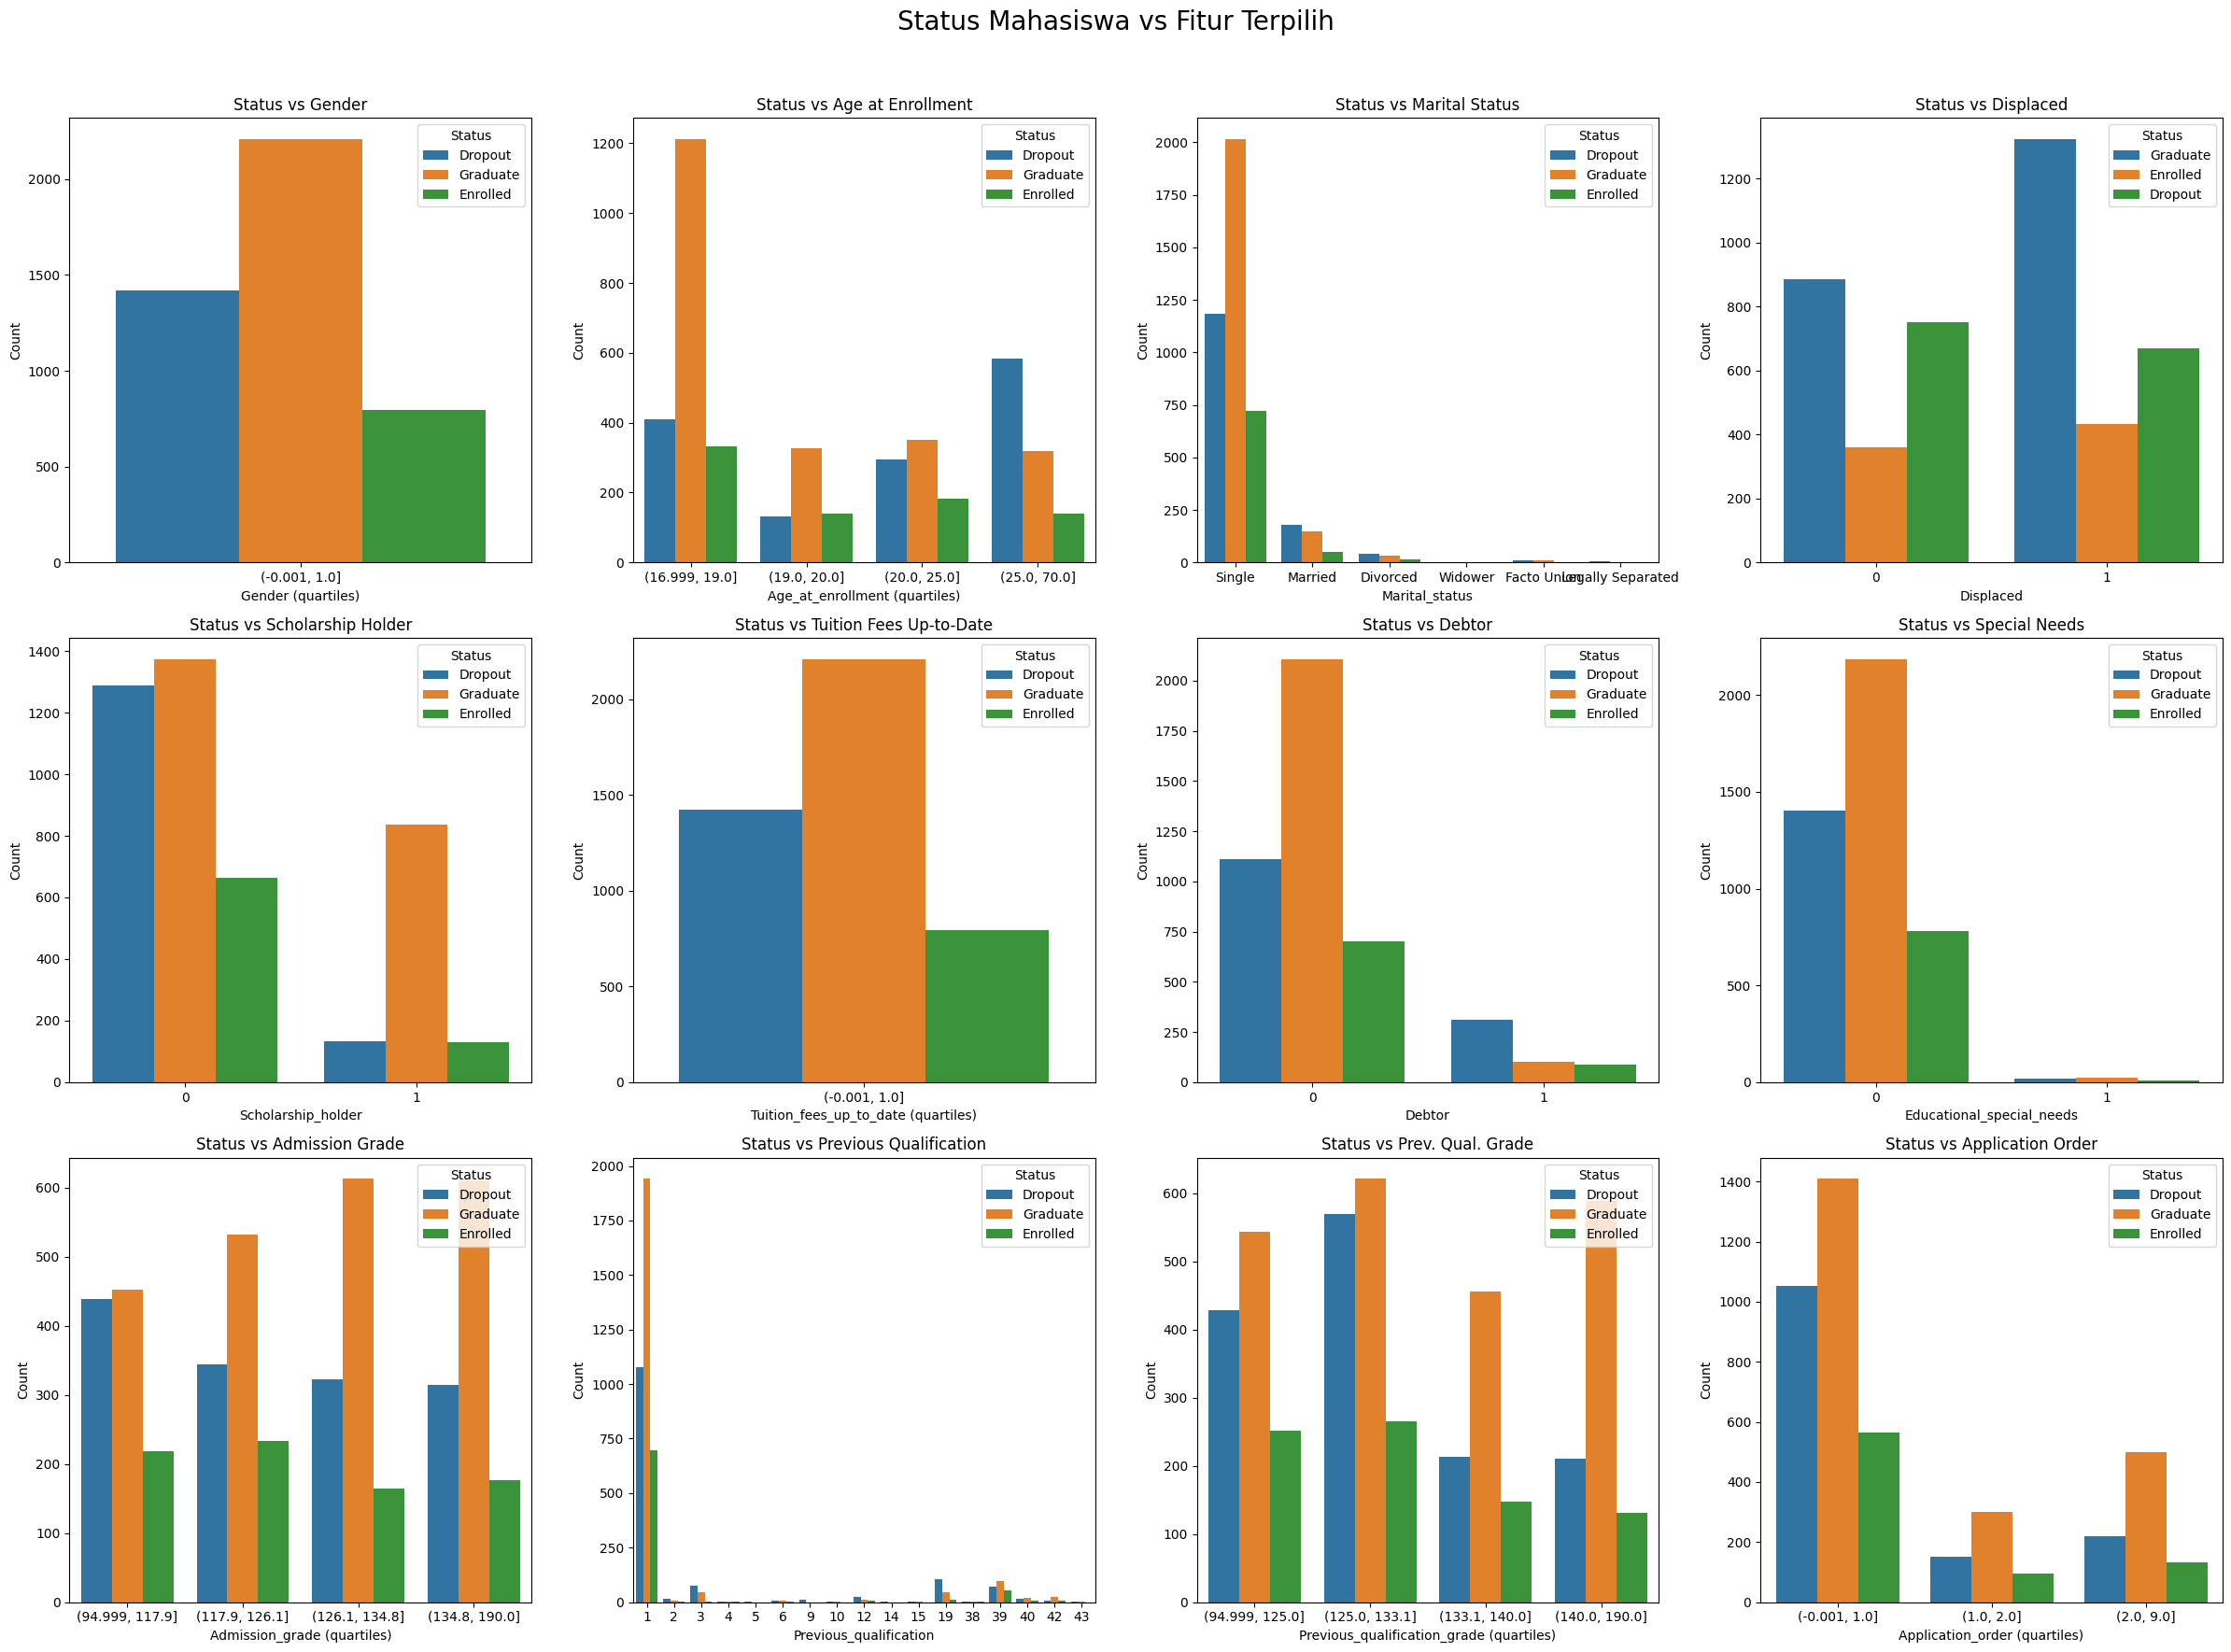

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(24, 18))
fig.suptitle('Status Mahasiswa vs Fitur Terpilih', fontsize=20)

plot_features = [
    # Demografi & Sosial
    ('Gender', 'Status vs Gender'),
    ('Age_at_enrollment', 'Status vs Age at Enrollment'),
    ('Marital_status', 'Status vs Marital Status'),
    ('Displaced', 'Status vs Displaced'),
    # Ekonomi & Beasiswa
    ('Scholarship_holder', 'Status vs Scholarship Holder'),
    ('Tuition_fees_up_to_date', 'Status vs Tuition Fees Up-to-Date'),
    ('Debtor', 'Status vs Debtor'),
    ('Educational_special_needs', 'Status vs Special Needs'),
    # Akademik Awal
    ('Admission_grade', 'Status vs Admission Grade'),
    ('Previous_qualification', 'Status vs Previous Qualification'),
    ('Previous_qualification_grade', 'Status vs Prev. Qual. Grade'),
    ('Application_order', 'Status vs Application Order'),
    # Anda bisa ganti atau tambah di sini jika ingin
]

for ax, (col, title) in zip(axes.flatten(), plot_features):
    # Jika kolom numerik, ubah menjadi kategori (bin) terlebih dahulu
    if df[col].dtype in ['int64', 'float64'] and col not in [
        'Marital_status','Previous_qualification','Displaced',
        'Scholarship_holder','Debtor','Educational_special_needs'
    ]:
        # misal pada Admission_grade atau Age_at_enrollment
        df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
        sns.countplot(x=f'{col}_bin', hue='Status', data=df, ax=ax)
        ax.set_xlabel(f'{col} (quartiles)')
    else:
        sns.countplot(x=col, hue='Status', data=df, ax=ax)

    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.legend(title='Status', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### Insight dari Analisis Fitur Demografi, Sosial, dan Akademik Mahasiswa

Berdasarkan eksplorasi data pada fitur-fitur utama, berikut beberapa insight penting yang dapat diambil:

- **Displaced:** Lebih dari separuh mahasiswa (55%) merupakan pendatang, menunjukkan kampus ini menarik banyak mahasiswa dari luar daerah asal.
- **Educational Special Needs:** Hanya 1% mahasiswa yang memiliki kebutuhan khusus, sehingga kelompok ini merupakan minoritas.
- **Gender:** Komposisi mahasiswa didominasi perempuan (65%), sedangkan laki-laki hanya 35%. Ketimpangan gender ini cukup signifikan.
- **Scholarship Holder:** Hanya 25% mahasiswa yang menerima beasiswa, sisanya membiayai sendiri atau melalui sumber lain.
- **Debtor & Tuition Fees:** Mayoritas mahasiswa tidak memiliki tunggakan (89%) dan sudah melunasi pembayaran kuliah (88%), menandakan tingkat kepatuhan pembayaran yang tinggi.
- **International:** Mahasiswa internasional sangat sedikit (2,5%), sehingga kampus didominasi mahasiswa lokal.
- **Orang Tua (Pendidikan & Pekerjaan):**
    - Pendidikan orang tua mayoritas pada tingkat menengah atau dasar, baik ibu maupun ayah.
    - Sebagian besar orang tua bekerja di sektor informal atau pekerjaan tidak terampil, baik ibu maupun ayah.
- **Previous Qualification:** Hampir seluruh mahasiswa berasal dari pendidikan menengah (SMA/sederajat), hanya sebagian kecil dari jalur pendidikan tinggi atau vokasi.
- **Nacionality:** Hampir seluruh mahasiswa adalah warga negara Portugal, mahasiswa asing sangat sedikit.

Insight ini penting untuk memahami karakteristik populasi mahasiswa, potensi risiko dropout, serta faktor sosial-ekonomi dan akademik yang dapat memengaruhi keberhasilan studi. Data ini juga dapat digunakan untuk merancang intervensi atau kebijakan yang lebih tepat sasaran sesuai profil mahasiswa.

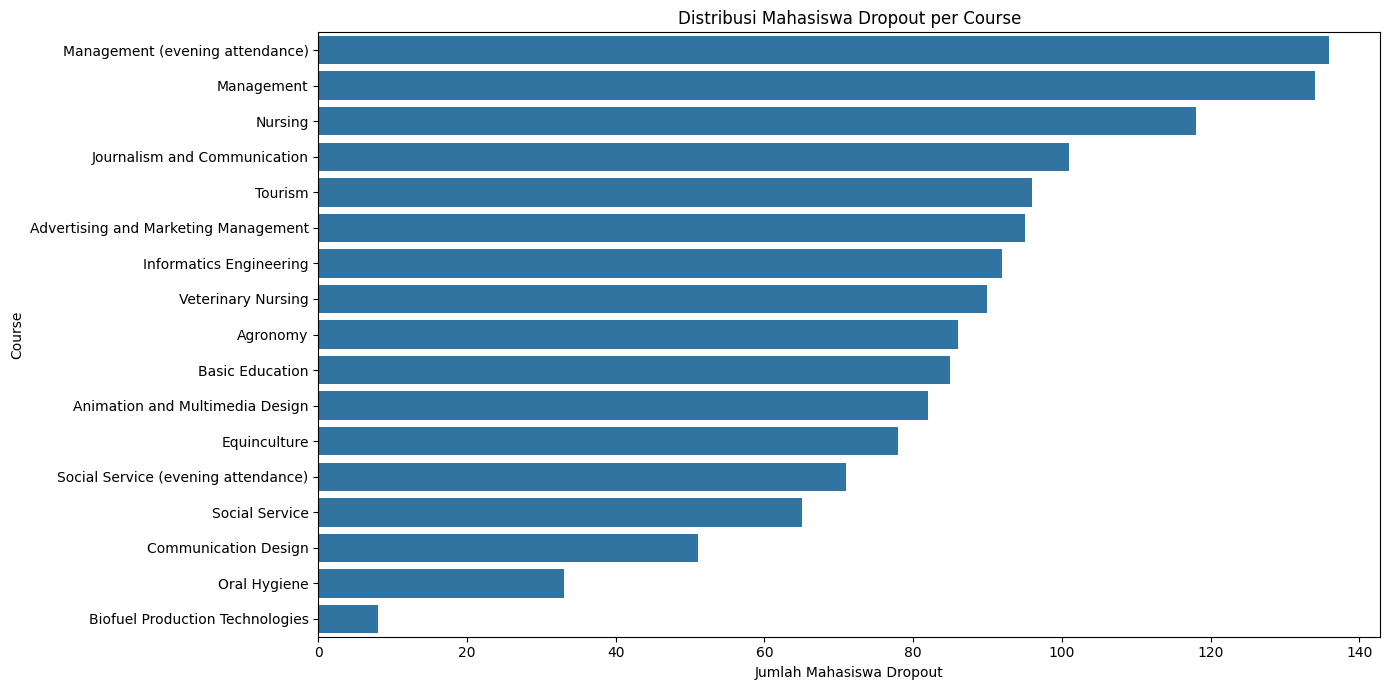

In [70]:
# Mapping kode Course ke deskripsi
course_labels = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}
df['Course_label'] = df['Course'].map(course_labels)

# Filter hanya mahasiswa yang Dropout
df_dropout = df[df['Status'] == 'Dropout']

plt.figure(figsize=(14, 7))
sns.countplot(data=df_dropout, y='Course_label', order=df_dropout['Course_label'].value_counts().index)
plt.title('Distribusi Mahasiswa Dropout per Course')
plt.xlabel('Jumlah Mahasiswa Dropout')
plt.ylabel('Course')
plt.tight_layout()
plt.show()


##### Insight Distribusi Mahasiswa Dropout per Program Studi

Berdasarkan visualisasi distribusi mahasiswa dropout pada masing-masing program studi, diperoleh beberapa insight penting:

- **Program studi dengan jumlah dropout tertinggi** adalah *Management (evening attendance)* dan *Management*, masing-masing lebih dari 130 mahasiswa dropout. Hal ini menunjukkan bahwa jurusan manajemen, baik reguler maupun kelas malam, memiliki tingkat risiko dropout yang tinggi.
- *Nursing* juga menempati posisi atas dalam jumlah dropout, diikuti oleh *Journalism and Communication*, *Tourism*, dan *Advertising and Marketing Management*. Program-program ini perlu mendapatkan perhatian khusus dalam upaya pencegahan dropout.
- Jurusan dengan jumlah dropout paling sedikit adalah *Biofuel Production Technologies* dan *Oral Hygiene*. Hal ini bisa disebabkan oleh jumlah mahasiswa yang memang sedikit atau tingkat ketertarikan dan komitmen mahasiswa yang lebih tinggi pada bidang tersebut.
- Secara umum, **program studi dengan jumlah mahasiswa terbanyak cenderung memiliki jumlah dropout yang lebih tinggi**, namun perlu analisis lebih lanjut untuk mengetahui rasio dropout terhadap total mahasiswa di tiap jurusan.
- Temuan ini dapat menjadi dasar bagi pihak kampus untuk melakukan evaluasi dan intervensi pada program studi dengan tingkat dropout tinggi, misalnya melalui peningkatan layanan akademik, konseling, atau penyesuaian kurikulum.

Insight ini penting untuk membantu institusi pendidikan dalam merancang strategi pencegahan dropout yang lebih efektif dan tepat sasaran sesuai karakteristik masing-masing program studi.

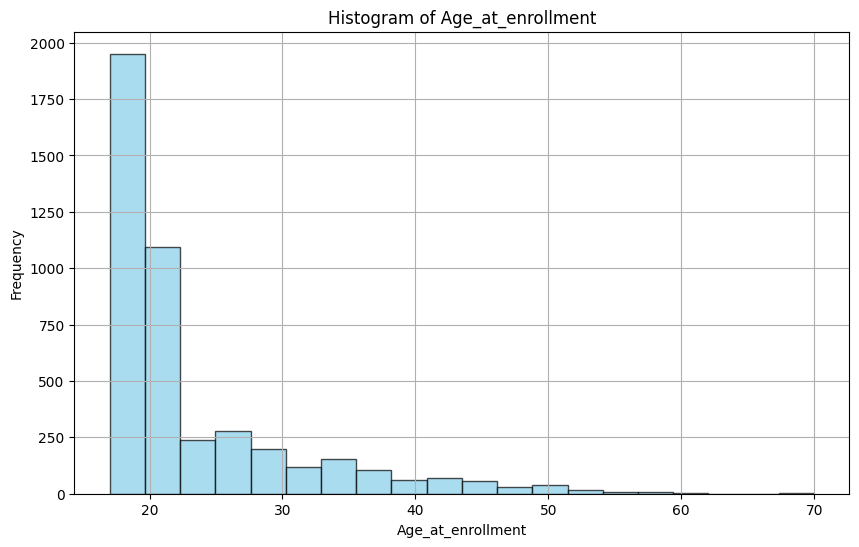

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age_at_enrollment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age_at_enrollment')
plt.ylabel('Frequency')
plt.title('Histogram of Age_at_enrollment')
plt.grid(True)
plt.show()

In [75]:
# Simpan dataset yang sudah diubah labelnya untuk keperluan visualisasi di Metabase
# Pastikan kolom-kolom label sudah di-mapping ke bentuk deskriptif

# Salin dataframe agar tidak mengubah df asli
df_metabase = df.copy()

# Mapping label untuk kolom-kolom biner/kategorikal
df_metabase['Displaced'] = df_metabase['Displaced'].map(displaced_labels)
df_metabase['Educational_special_needs'] = df_metabase['Educational_special_needs'].map(educational_special_needs_labels)
df_metabase['Debtor'] = df_metabase['Debtor'].map(debtor_labels)
df_metabase['Tuition_fees_up_to_date'] = df_metabase['Tuition_fees_up_to_date'].map(tuition_fees_labels)
df_metabase['Gender'] = df_metabase['Gender'].map(gender_labels)
df_metabase['Scholarship_holder'] = df_metabase['Scholarship_holder'].map(scholarship_labels)
df_metabase['International'] = df_metabase['International'].map(international_labels)
df_metabase['Marital_status'] = df_metabase['Marital_status'].map(marital_status_labels)
df_metabase['Course'] = df_metabase['Course'].map(course_labels)
df_metabase['Previous_qualification'] = df_metabase['Previous_qualification'].map(previous_qualification_labels)
df_metabase['Mothers_qualification'] = df_metabase['Mothers_qualification'].map(mothers_qualification_labels)
df_metabase['Fathers_qualification'] = df_metabase['Fathers_qualification'].map(fathers_qualification_labels)
df_metabase['Mothers_occupation'] = df_metabase['Mothers_occupation'].map(mothers_occupation_labels)
df_metabase['Fathers_occupation'] = df_metabase['Fathers_occupation'].map(fathers_occupation_labels)
df_metabase['Nacionality'] = df_metabase['Nacionality'].map(nacionality_labels)
df_metabase['Daytime_evening_attendance'] = df_metabase['Daytime_evening_attendance'].map(daytime_attendance_labels)

# Simpan ke file CSV
df_metabase.to_csv('data_for_metabase.csv', index=False)

print("Dataset sudah disimpan dengan label deskriptif. File: data_for_metabase.csv")
# Keterangan: Data ini digunakan untuk visualisasi di Metabase

Dataset sudah disimpan dengan label deskriptif. File: data_for_metabase.csv


## Data Preparation / Preprocessing

In [127]:
# melihat nilai untuk tiap kategori baik numerik maupun kategorik
numeric = df_model.select_dtypes(exclude=['object']).columns
categoric = df_model.select_dtypes(include=['object']).columns

print("jumlah kolom numerik", len(numeric))
print("jumlah kolom kategorik", len(categoric))

jumlah kolom numerik 36
jumlah kolom kategorik 1


In [128]:
# Cek Outlier
print(f'Jumlah baris: {len(df_model)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df_model))
for col in numeric:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # mulai filter outlier
    filter_outlier = ((df_model[col] >= low_limit) & (df_model[col] <= high_limit))
    outlier.append(len(df_model[~filter_outlier]))
    no_outlier.append(len(df_model[filter_outlier]))
    is_outlier.append(df_model[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df_model[col] >= low_limit) & (df_model[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df_model[~filtered_entries]))
print("Not Outlier All Data :", len(df_model[filtered_entries]))
print()

# Pastikan numeric diubah ke list jika masih berupa Index
pd.DataFrame({
    "Column Name": list(numeric),
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier": outlier,
    "No Outlier": no_outlier
})


Jumlah baris: 4424
Outlier All Data : 3519
Not Outlier All Data : 905



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Marital_status,True,1.000,1.000000,505,3919
1,Application_mode,False,-56.000,96.000000,0,4424
2,Application_order,True,-0.500,3.500000,541,3883
3,Course,True,8378.500,10262.500000,442,3982
4,Daytime_evening_attendance,False,1.000,1.000000,483,3941
5,Previous_qualification,True,1.000,1.000000,707,3717
6,Previous_qualification_grade,True,102.500,162.500000,179,4245
7,Nacionality,True,1.000,1.000000,110,4314
8,Mothers_qualification,False,-50.500,89.500000,0,4424
9,Fathers_qualification,False,-48.000,88.000000,0,4424


### Deteksi Outlier pada Data

- **Jumlah baris data:** 4.424
- **Jumlah baris terdeteksi sebagai outlier (pada minimal satu kolom):** 3.519
- **Jumlah baris tanpa outlier (masuk rentang normal di semua kolom):** 905



| No | Kolom                                | Outlier? | Batas Bawah | Batas Atas | Jumlah Outlier | Jumlah Normal |
|----|--------------------------------------|----------|-------------|------------|----------------|---------------|
| 0  | Marital_status                       | Ya       | 1.000       | 1.000      | 505            | 3919          |
| 1  | Application_mode                     | Tidak    | -56.000     | 96.000     | 0              | 4424          |
| 2  | Application_order                    | Ya       | -0.500      | 3.500      | 541            | 3883          |
| 3  | Course                               | Ya       | 8378.500    | 10262.500  | 442            | 3982          |
| 4  | Daytime_evening_attendance           | Tidak    | 1.000       | 1.000      | 483            | 3941          |
| 5  | Previous_qualification               | Ya       | 1.000       | 1.000      | 707            | 3717          |
| 6  | Previous_qualification_grade         | Ya       | 102.500     | 162.500    | 179            | 4245          |
| 7  | Nacionality                          | Ya       | 1.000       | 1.000      | 110            | 4314          |
| 8  | Mothers_qualification                | Tidak    | -50.500     | 89.500     | 0              | 4424          |
| 9  | Fathers_qualification                | Tidak    | -48.000     | 88.000     | 0              | 4424          |
| 10 | Mothers_occupation                   | Ya       | -3.500      | 16.500     | 182            | 4242          |
| 11 | Fathers_occupation                   | Ya       | -3.500      | 16.500     | 177            | 4247          |
| 12 | Admission_grade                      | Ya       | 92.550      | 160.150    | 86             | 4338          |
| 13 | Displaced                            | Tidak    | -1.500      | 2.500      | 0              | 4424          |
| 14 | Educational_special_needs            | Ya       | 0.000       | 0.000      | 51             | 4373          |
| 15 | Debtor                               | Ya       | 0.000       | 0.000      | 503            | 3921          |
| 16 | Tuition_fees_up_to_date              | Tidak    | 1.000       | 1.000      | 528            | 3896          |
| 17 | Gender                               | Tidak    | -1.500      | 2.500      | 0              | 4424          |
| 18 | Scholarship_holder                   | Ya       | 0.000       | 0.000      | 1099           | 3325          |
| 19 | Age_at_enrollment                    | Ya       | 10.000      | 34.000     | 441            | 3983          |
| 20 | International                        | Ya       | 0.000       | 0.000      | 110            | 4314          |
| 21 | Curricular_units_1st_sem_credited    | Ya       | 0.000       | 0.000      | 577            | 3847          |
| 22 | Curricular_units_1st_sem_enrolled    | Ya       | 2.000       | 10.000     | 424            | 4000          |
| 23 | Curricular_units_1st_sem_evaluations | Ya       | 0.000       | 16.000     | 158            | 4266          |
| 24 | Curricular_units_1st_sem_approved    | Ya       | -1.500      | 10.500     | 180            | 4244          |
| 25 | Curricular_units_1st_sem_grade       | Ya       | 7.400       | 17.000     | 726            | 3698          |
| 26 | Curricular_units_1st_sem_without_evaluations | Ya | 0.000 | 0.000 | 294 | 4130 |
| 27 | Curricular_units_2nd_sem_credited    | Ya       | 0.000       | 0.000      | 530            | 3894          |
| 28 | Curricular_units_2nd_sem_enrolled    | Ya       | 2.000       | 10.000     | 369            | 4055          |
| 29 | Curricular_units_2nd_sem_evaluations | Ya       | 0.000       | 16.000     | 109            | 4315          |
| 30 | Curricular_units_2nd_sem_approved    | Ya       | -4.000      | 12.000     | 44             | 4380          |
| 31 | Curricular_units_2nd_sem_grade       | Ya       | 6.875       | 17.208     | 877            | 3547          |
| 32 | Curricular_units_2nd_sem_without_evaluations | Ya | 0.000 | 0.000 | 282 | 4142 |
| 33 | Unemployment_rate                    | Tidak    | 2.650       | 20.650     | 0              | 4424          |
| 34 | Inflation_rate                       | Tidak    | -3.150      | 6.050      | 0              | 4424          |
| 35 | GDP                                  | Tidak    | -6.935      | 7.025      | 0              | 4424          |

**Catatan:**
- Kolom dengan "Outlier? = Ya" berarti terdapat data di luar rentang normal (IQR).
- Banyak fitur kategorikal biner (0/1) terdeteksi outlier karena metode IQR tidak cocok untuk data diskrit/biner.
- Penanganan outlier perlu disesuaikan dengan konteks dan karakteristik masing-masing fitur.

### Label Encoding 

In [3]:
# membuat label encoder untuk kolom target
label_encoder = LabelEncoder()

df_model['Status'] = label_encoder.fit_transform(df_model['Status'])

In [5]:
df_encoding = df_model.copy()

In [6]:
ml =  df_encoding.select_dtypes(include='object').columns

In [7]:
keep_cols = [
    'Course', 
    'Daytime_evening_attendance', 
    'Admission_grade', 
    'Educational_special_needs', 
    'Debtor', 
    'Tuition_fees_up_to_date', 
    'Gender', 
    'Scholarship_holder', 
    'Age_at_enrollment', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Status'
]
dataNew = df_model[keep_cols].copy()

In [8]:
dataNew['Status_New'] = dataNew['Status'].replace({2: 1})

In [9]:
dataNewEncoded = pd.get_dummies(dataNew, columns=['Status'], prefix='Status')
dataNewEncoded = pd.concat([dataNewEncoded, dataNew['Status']], axis=1)

In [10]:
dataNewEncoded.head(5)

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,True,False,False,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,1,False,False,True,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,True,False,False,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,1,False,False,True,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,1,False,False,True,2


In [145]:
dataNewEncoded.corr()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
Course,1.000000,-0.043151,-0.125058,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,0.389349,0.348728,0.033676,-0.033676,0.002758,0.029333,0.034219
Daytime_evening_attendance,-0.043151,1.000000,0.007970,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.063974,0.050493,0.080499,-0.080499,0.022073,0.058235,0.075107
Admission_grade,-0.125058,0.007970,1.000000,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.073868,0.074402,0.095806,-0.095806,-0.046634,0.125263,0.120889
Educational_special_needs,-0.018795,0.031017,-0.018306,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.012284,-0.012761,-0.002806,0.002806,0.010190,-0.010441,-0.007353
Debtor,-0.032673,0.006658,-0.014423,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,-0.104170,-0.139424,-0.229407,0.229407,-0.000513,-0.213845,-0.240999
Tuition_fees_up_to_date,0.018381,0.038799,0.054132,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,0.250394,0.296480,0.429149,-0.429149,0.095864,0.327197,0.409827
Gender,-0.099571,-0.012326,0.008315,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.189448,-0.199133,-0.203983,0.203983,0.034214,-0.216754,-0.229270
Scholarship_holder,0.017138,0.093912,0.018881,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,0.168324,0.181227,0.245354,-0.245354,-0.091666,0.299484,0.297595
Age_at_enrollment,0.042994,-0.462280,-0.029915,-0.036987,0.098793,-0.178099,0.148835,-0.189917,1.000000,-0.156616,-0.173419,-0.254215,0.254215,-0.055241,-0.195009,-0.243438
Curricular_units_1st_sem_grade,0.389349,0.063974,0.073868,-0.012284,-0.104170,0.250394,-0.189448,0.168324,-0.156616,1.000000,0.837170,0.480669,-0.480669,0.046781,0.412982,0.485207


#### Insight Korelasi Antar Fitur dan Target

Berdasarkan matriks korelasi di atas, berikut beberapa insight penting terkait hubungan antar fitur dan target (`Status`):

- **Fitur dengan Korelasi Tinggi ke Status:**
    - `Curricular_units_2nd_sem_grade` (0.57) dan `Curricular_units_1st_sem_grade` (0.49) memiliki korelasi positif kuat terhadap status mahasiswa. Artinya, semakin tinggi nilai rata-rata mata kuliah di semester 1 dan 2, semakin besar kemungkinan mahasiswa untuk lulus atau tetap terdaftar.
    - `Tuition_fees_up_to_date` (0.41) dan `Scholarship_holder` (0.30) juga berkorelasi positif, menunjukkan mahasiswa yang rajin membayar dan penerima beasiswa cenderung memiliki status akademik yang baik.
    - `Admission_grade` (0.12) dan `Age_at_enrollment` (-0.24) memiliki korelasi lemah, namun tetap menunjukkan bahwa nilai masuk yang tinggi sedikit meningkatkan peluang kelulusan, sedangkan usia lebih tua sedikit menurunkan peluang tersebut.

- **Fitur dengan Korelasi Negatif ke Status:**
    - `Debtor` (-0.24) dan `Gender` (-0.23) menunjukkan korelasi negatif, artinya mahasiswa yang memiliki tunggakan atau berjenis kelamin laki-laki cenderung lebih berisiko dropout.
    - `Age_at_enrollment` juga negatif, menandakan mahasiswa yang lebih tua saat masuk lebih berisiko tidak lulus.

- **Korelasi Antar Fitur Akademik:**
    - Nilai semester 1 dan 2 (`Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade`) sangat berkorelasi satu sama lain (0.84), menandakan konsistensi performa akademik antar semester.

- **Fitur Lain:**
    - Fitur seperti `Educational_special_needs` dan `Daytime_evening_attendance` memiliki korelasi sangat lemah terhadap status, sehingga pengaruhnya terhadap prediksi status mahasiswa relatif kecil.

**Kesimpulan:**  
Fitur akademik (nilai mata kuliah), kepatuhan pembayaran, dan status beasiswa merupakan indikator terkuat dalam menentukan status akhir mahasiswa. Sementara itu, faktor demografi seperti gender dan usia juga berpengaruh, namun tidak sebesar faktor akademik dan ekonomi. Insight ini dapat digunakan untuk memilih fitur utama dalam pemodelan prediksi status mahasiswa.

### Data Split

In [11]:
# mengcopy data untuk modeling
df_modeling = dataNewEncoded.copy()
# membuat data target 
X = df_modeling.iloc[:, :11]
Y = df_modeling.iloc[:, 11:12]
# membagi data menjadi data train dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (3539, 11)
Testing : (885, 11)


## Modeling

In [14]:
# Daftar model dasar (tanpa scaling karena diasumsikan sudah ditangani)
base_models = {
    "Logistic L1": LogisticRegression(penalty='l1', solver='saga', max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}

# Menyimpan hasil evaluasi
results = []

# Evaluasi tiap model
for name, base_model in base_models.items():
    model = MultiOutputClassifier(base_model)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Evaluasi global per metrik: hitung rata-rata semua label target
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
    rec = recall_score(Y_test, Y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, Y_pred, average='weighted', zero_division=0)

    results.append([name, acc, prec, rec, f1])

# Tampilkan hasil
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df.to_string(index=False))


[LightGBM] [Info] Number of positive: 2434, number of negative: 1105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.687765 -> initscore=0.789691
[LightGBM] [Info] Start training from score 0.789691
        Model  Accuracy  Precision   Recall  F1-Score
  Logistic L1  0.786441   0.808295 0.786441  0.764988
Random Forest  0.835028   0.835545 0.835028  0.829931
     CatBoost  0.831638   0.833001 0.831638  0.825720
     LightGBM  0.840678   0.842505 0.840678  0.835274
    SVM (RBF)  0.642938   0.413369 0.642938  0.503207


## Evaluation

In [15]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

### Cross Validation

In [18]:
for name, model in base_models.items():
    # Cross validation score
    Y_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='f1')

    # cetak rata-rata skor
    print(f"Rata-rata skor {name}:", round(np.mean(Y_scores), 2))

Rata-rata skor Logistic L1: 0.78
Rata-rata skor Random Forest: 0.91
Rata-rata skor CatBoost: 0.86
[LightGBM] [Info] Number of positive: 2148, number of negative: 2175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 4323, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496877 -> initscore=-0.012491
[LightGBM] [Info] Start training from score -0.012491
[LightGBM] [Info] Number of positive: 2148, number of negative: 2175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 4323, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496877

## Save Model

In [ ]:

# Melatih model Random Forest pada data training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train.values.ravel())

# Simpan model ke file .joblib
dump(rf_model, 'random_forest_model.joblib')

print("Model Random Forest berhasil disimpan ke random_forest_model.joblib")

Model Random Forest berhasil disimpan ke random_forest_model.joblib


In [21]:
# Simpan model Random Forest ke file .pkl menggunakan pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model Random Forest berhasil disimpan ke random_forest_model.pkl")

Model Random Forest berhasil disimpan ke random_forest_model.pkl
